In [2]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

<h3>1.Import the dataset and explore basic info (nulls, data types).</h3>

In [3]:
#uploading the dataset

data = pd.read_csv("C:/Users/ASUS_AMZAD/Downloads/Titanic-Dataset.csv" ,header=0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#checking which column haas null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<p> The Age , Cabin and Embarked column has null values as we check by <b>isnull()</b> function</p? 

<h3>2.Handle missing values using mean/median/imputation.</h3>

In [7]:
#filling the null values in Age column by mean imputation method

data['Age'] = data['Age'].fillna(data['Age'].mean())

In [9]:
#filling the null values in Cabin column by mode imputation method

data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [10]:
#filling the null values in Embarked column by mode imputation method
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
#checking if the dataset still contains any null values 
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<p>It can be clearly seen that there are no null values left in our dataset. And we can perform further analysis on this data.</p> 

<h3>3.Convert categorical features into numerical using encoding.</h3>

In [12]:
le = LabelEncoder()

In [13]:
categorical_cols = ['Sex','Cabin','Embarked']

In [14]:
#converting all the categorical columns into numeric

for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB


<p>There are only two columns(Name, Ticket) left as string. But we can leave them as they don't provide any usefull analysis.</p>

<h3>4. Normalize/standardize the numerical features.</h3>

In [16]:
numeric_cols = ['Pclass','Age','Fare']

In [17]:
scaler = MinMaxScaler()

In [18]:
#Normalizing all the numeric columns using minmax class

data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [19]:
data[numeric_cols].head()

,Pclass,Age,Fare
0,1.0,0.271174,0.014151
1,0.0,0.472229,0.139136
2,1.0,0.321438,0.015469
3,0.0,0.434531,0.103644
4,1.0,0.434531,0.015713


<p> All the the most import columns(Pclass, Age, Fare) are normalized between 0 and 1.</p>

<h3>5.Visualize outliers using boxplots and remove them.</h3>

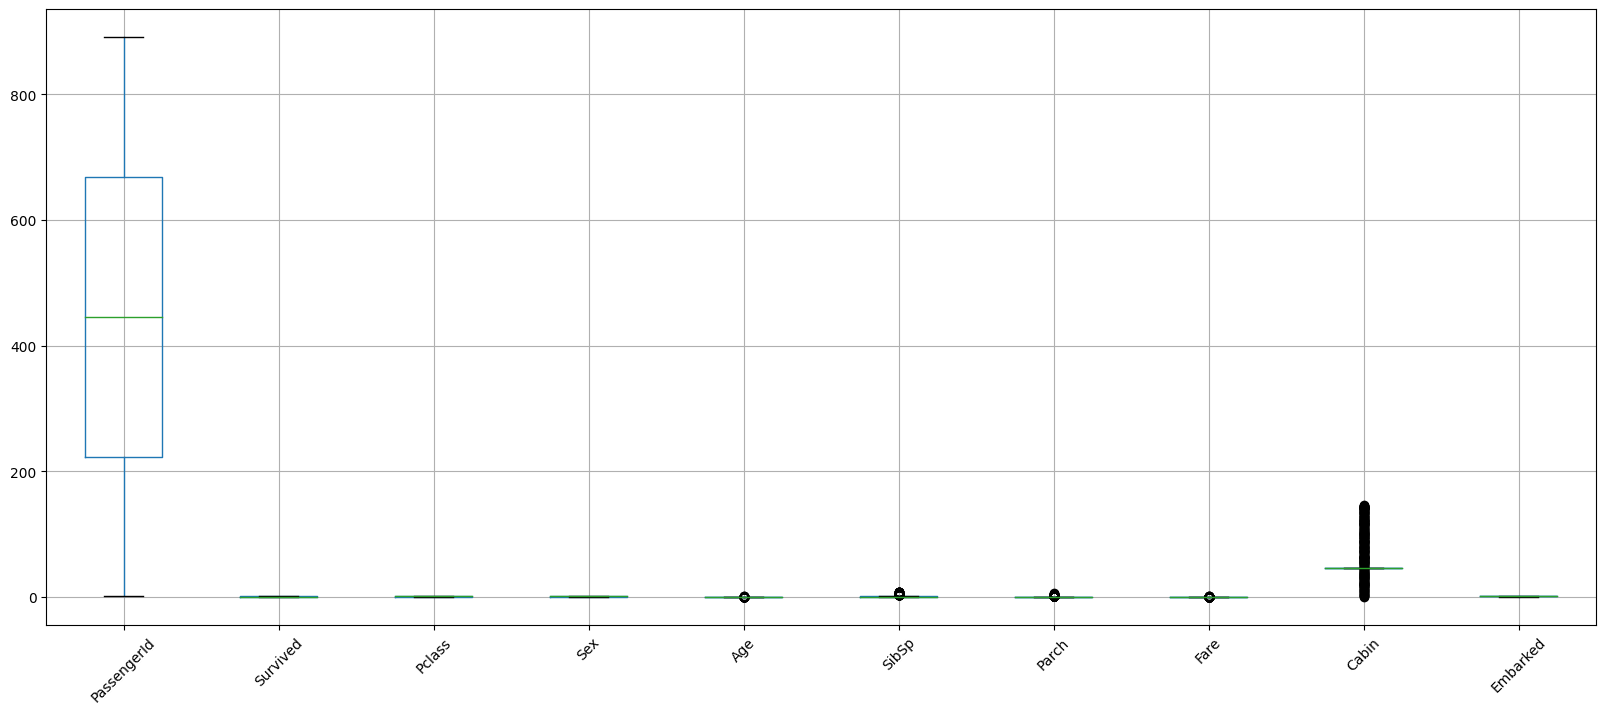

In [21]:
data_numeric=data.select_dtypes(include=['number'])
data_numeric.boxplot(figsize=(20,8))
plt.xticks(rotation=45)
plt.show()

In [22]:
#to remove outliers from all numeric columns

numeric_cols = data.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    data = data[(data[col] >= lower_bound) & (data[col]<=upper_bound)]

In [23]:
#data after cleaning and preprocessing

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.0,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,47,2
2,3,1,1.0,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,47,2
4,5,0,1.0,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,47,2
5,6,0,1.0,"Moran, Mr. James",1,0.367921,0,0,330877,0.016510,47,1
9,10,1,0.5,"Nasser, Mrs. Nicholas (Adele Achem)",0,0.170646,1,0,237736,0.058694,47,0
